In [1]:
import numpy as np
import matplotlib.pyplot as plt

import vehicle_models.model_comparison as cm
from utils.plot_vehicle import plot_vehicle as pv
from utils.vizard import vizard as vz

%matplotlib notebook

In [2]:
def main():
    print("Running simulation...")

    def delta(t):
        stwa = 0
        tp = [0.0, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1]
        dp = [0.0, 0.0, 1.0, 1.0, -1.0, -1.0, 0.0]
        stwa = np.interp(t, tp, dp)

        stwa_ampl = 20 * np.pi / 180
        stwa_ratio = 18

        stwa_max = 520 * np.pi / 180
        stwa = max(min(stwa_max, stwa), -stwa_max)

        delta = stwa_ampl * stwa / stwa_ratio

        return delta

    vars_0 = [0.0, 0.0, 0.0, 0.0, 0.0]
    ti = np.arange(0, 5, 0.05)
    model = cm.CompareModels(vars_0, delta)
    sol = model.simulate(ti, v=30)
    x = sol[0][:, 0]
    y = sol[0][:, 1]
    psi = sol[0][:, 2]
    beta = sol[0][:, 3]
    r = sol[0][:, 4]
    beta_lin = sol[1][:, 0]
    r_lin = sol[1][:, 1]

    delta_vals = [delta(t) for t in ti]

    fig, (ax1, ax2) = plt.subplots(2)

    ax1.axis("equal")

    ax2.plot(ti, delta_vals, "k-")
    ax2.plot(ti, beta, "r-")
    ax2.plot(ti, r, "g-")
    ax2.plot(ti, beta_lin, "m-")
    ax2.plot(ti, r_lin, "b-")

    ax2.legend(["delta", "beta", "r", "beta_lin", "r_lin"])

    (point1,) = ax1.plot([], [], marker="o", color="blue", ms=10)
    (point_delta,) = ax2.plot([], [], marker="o", color="black", ms=3)
    (point_beta,) = ax2.plot([], [], marker="o", color="red", ms=3)
    (point_r,) = ax2.plot([], [], marker="o", color="green", ms=3)
    (point_beta_lin,) = ax2.plot([], [], marker="o", color="magenta", ms=3)
    (point_r_lin,) = ax2.plot([], [], marker="o", color="blue", ms=3)

    def update(i, *fargs):
        [l.remove() for l in reversed(ax1.lines)]
        ax1.plot(x[: i + 1], y[: i + 1], "b-", linewidth=0.5)
        point1.set_data(x[i + 1], y[i + 1])
        pv.plot_vehicle(ax1, x[i], y[i], psi[i], delta_vals[i])

        point_delta.set_data(ti[i + 1], delta_vals[i + 1])
        point_beta.set_data(ti[i + 1], beta[i + 1])
        point_r.set_data(ti[i + 1], r[i + 1])
        point_beta_lin.set_data(ti[i + 1], beta_lin[i + 1])
        point_r_lin.set_data(ti[i + 1], r_lin[i + 1])
        for farg in fargs:
            print(farg)

    viz = vz.Vizard(fig, update, ti)
    plt.show()

Running simulation...


<IPython.core.display.Javascript object>


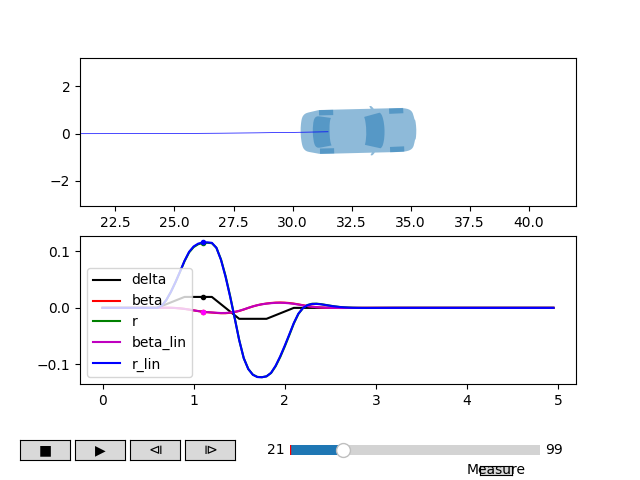

In [3]:
main()